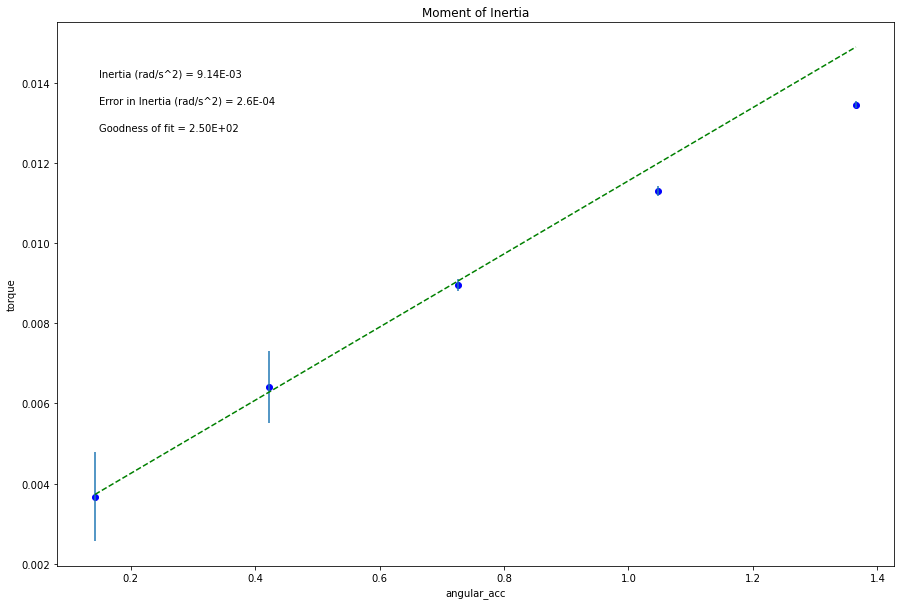

In [37]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
angular_acc = np.array([0.1428947368,0.4228070175,0.7266447368,1.047258772,1.365350877]) #what are units?
torque = np.array([0.0036697,0.006414,0.008964475,0.01130854167,0.0134617]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_torque = np.array([0.001107057415,0.0008924685904,0.0001496693444,0.0001317959913,0.00009624608972])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = angular_acc   #this should be the array you want to plot on the x axis
y = torque
dy = err_torque  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('angular_acc')
plt.ylabel('torque')
plt.title('Moment of Inertia')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Inertia (rad/s^2) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Inertia (rad/s^2) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


In [38]:
def rule4(Q,A,dA,m,B,dB,n,C,dC,o):
    s = ((m*dA/A)**2)+((n*dB/B)**2)+((o*dC/C)**2)
    return Q*np.sqrt(s)

In [39]:
#error in torque 1
T =0.0036697
r =0.0152
dr =0.00002
r_ex = 1
m1 =0.025
dm1 =0.0001
m1_ex =1
acc1 =0.1428947368
dacc1 =0.04310359614
acc_ex =1

print(rule4(T,r,dr,r_ex,m1,dm1,m1_ex,acc1,dacc1,acc_ex))

0.0011070574157429171


In [40]:
#Experimental I
print(m)

0.00913598693134981


In [32]:
#theoretical I
M =1.4369
R = 0.228*.5
I = M*(R**2)*.5

print(I)

0.009336976200000001
